### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

### Loading data

In [2]:
data = load_breast_cancer(as_frame=True)

# loading data
X = data.data
y = data.target

# combining data
breast_df = pd.concat([X, y], axis=1)

# displaying data
breast_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Answer the following questions


### How was the data obtained?


Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image

### How many classes are there?



In [3]:
amount_of_classes = len(breast_df['target'].unique().tolist())
print(f'Amount of classes: {amount_of_classes}')

Amount of classes: 2


In [4]:
breast_df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

Classes :

- WDBC-Malignant

- WDBC-Benign

### How many data points and features does the dataset contain?

In [5]:
breast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

- 539 data points
- 30 different features 

### Which kind of features are there?

In [6]:
breast_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Which feature(s) has/have the highest absolute values?

In [7]:
absolute_values = {}
features = breast_df.columns[:-1]

for feature in features:
    absolute_values[feature] = breast_df[feature].abs().max()

absolute_values_df = pd.DataFrame(absolute_values, index=['max_value']).T

max_value = absolute_values_df['max_value'].max()

absolute_values_df.loc[absolute_values_df['max_value'] == max_value]


,max_value
worst area,4254.0


### Which two features exhibit the highest correlation coefficient?

<Axes: title={'center': 'Correlation Matrix'}>

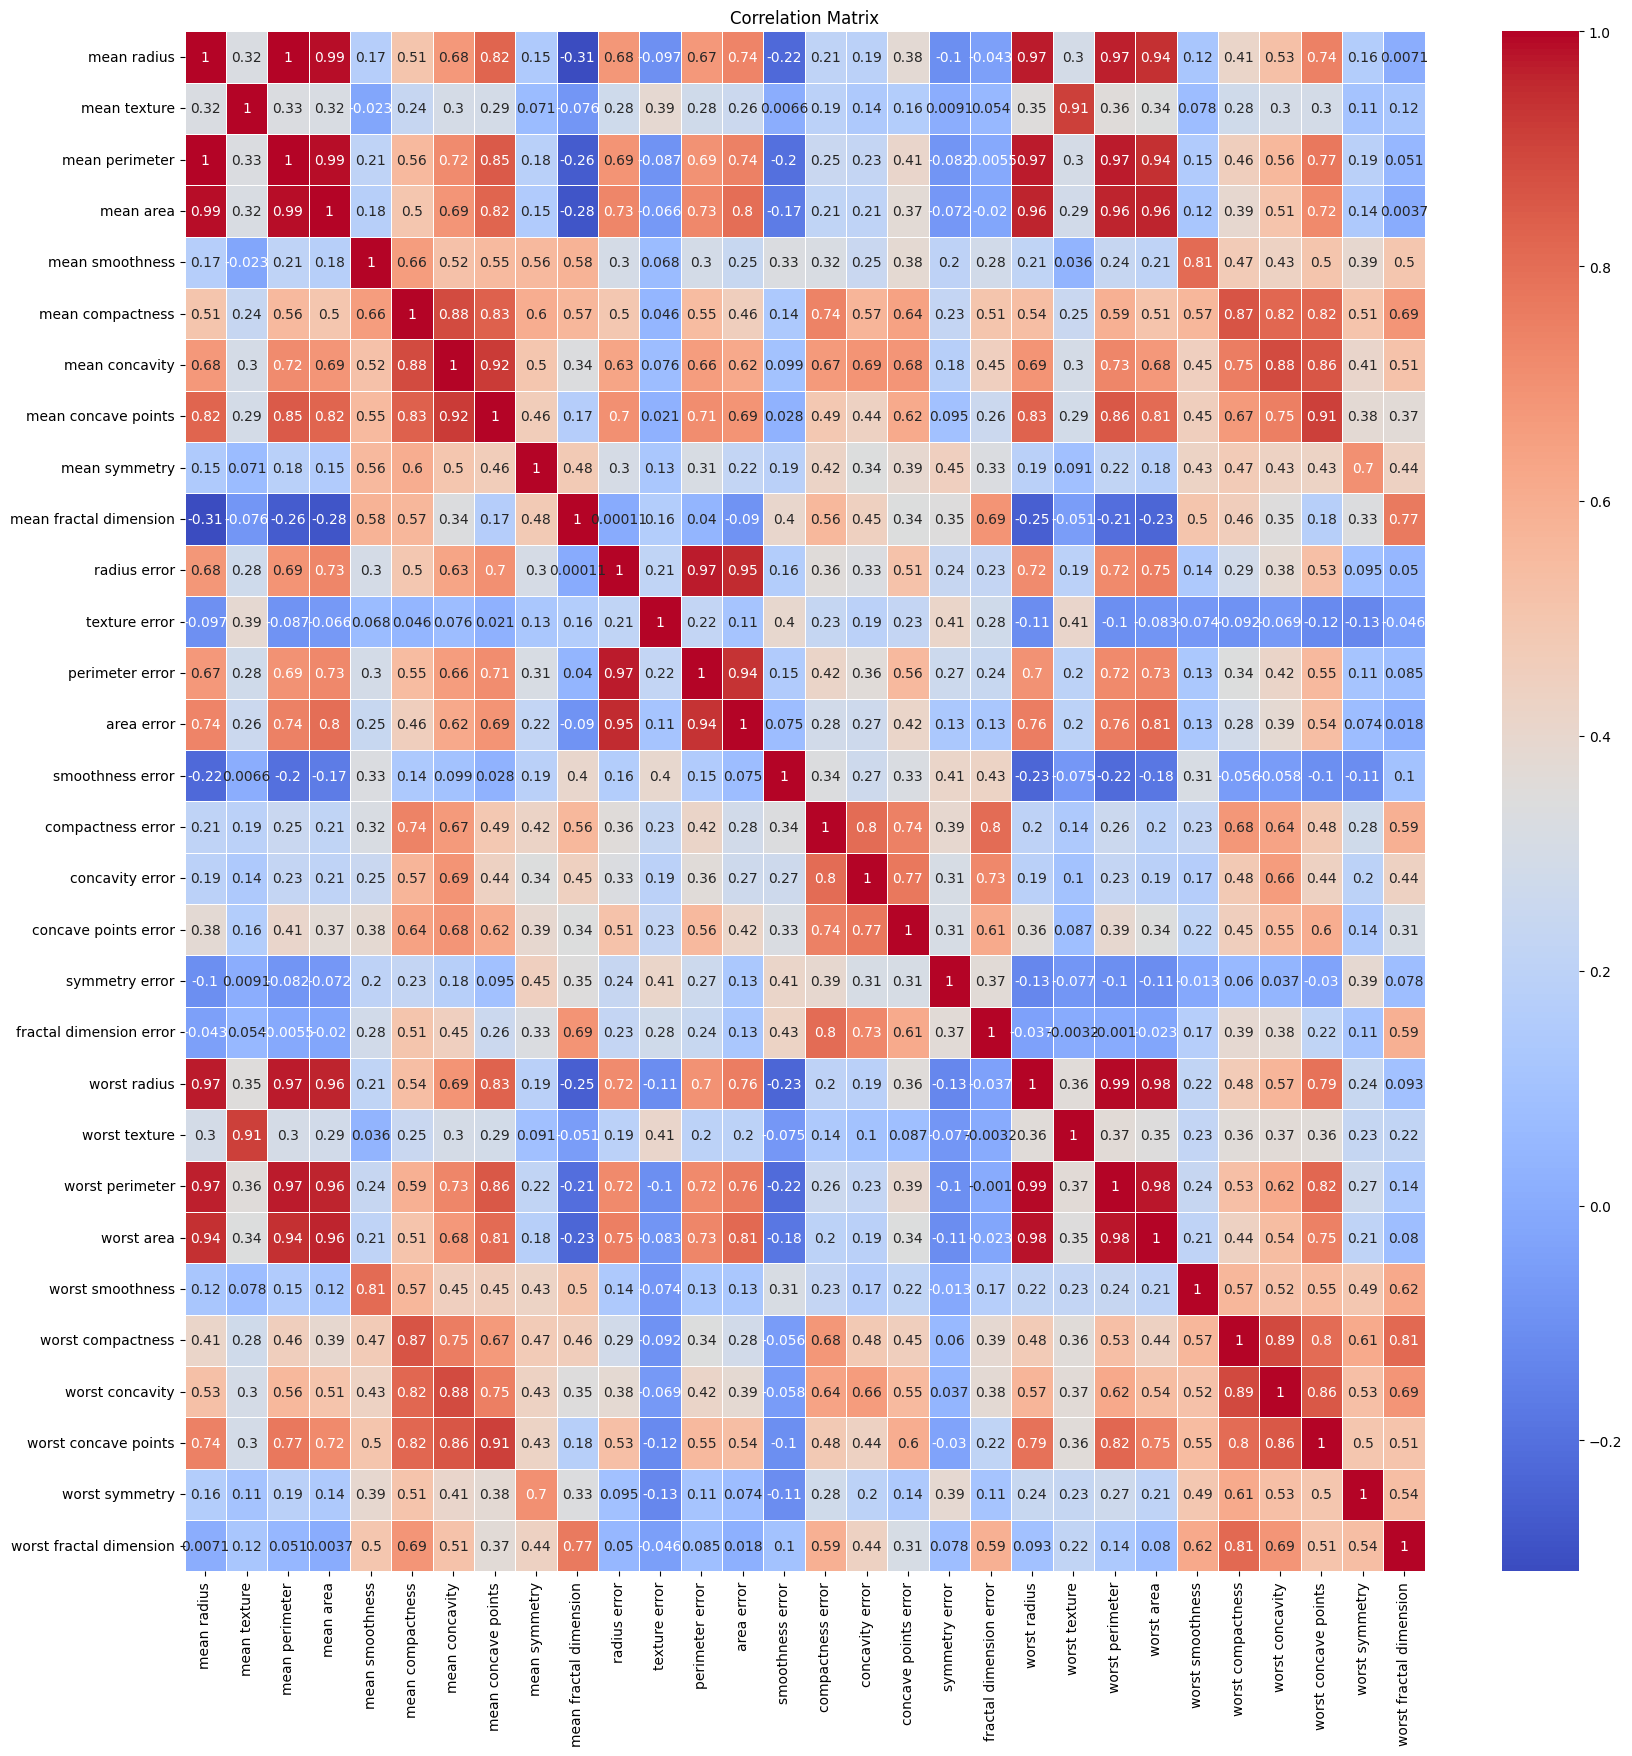

In [8]:
plt.figure(figsize=(20, 20))
plt.title('Correlation Matrix')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [9]:
def identify_the_most_correlated_features(correlation_matrix:pd.DataFrame):
    # set diagonal to nan
    np.fill_diagonal(correlation_matrix.values, np.nan)

    highest_correlation = None
    name_of_feature = None

    features_correlation = {}

    columns = correlation_matrix.columns
    for column in columns:
        features_correlation[column] = correlation_matrix[column].max()

    return features_correlation

In [10]:
correlation_matrix = breast_df.corr()

most_correlated_features = identify_the_most_correlated_features(correlation_matrix)

sorted_list = sorted(most_correlated_features.items(), key=lambda item: item[1])[::-1]

print(f"The most correlated features are: {sorted_list[0]}, {sorted_list[1]}")

The most correlated features are: ('mean perimeter', 0.9978552814938109), ('mean radius', 0.9978552814938109)


# Classification and Evaluation

1. Split data into training and test set (85:15).

2. Apply scaling to the dataset.

3. Train a KNeighborsClassifier and report the accuracy score on the test set.

- Seed the random generator.

- Set k = 7 for the k-NN.

4. Using your classifier (or its predictions), display a confusion matrix with the help of
sklearn’s ConfusionMatrixDisplay

In [11]:
class kNN_Classificator:
    def __init__(self, k:int, data:pd.DataFrame, classes: pd.Series):
        self.k = k
        self.data = data
        self.classes = classes
        self.cm = None

    def split_data(self, test_size:float, random_state:int=42):
        x_train, x_test, y_train, y_test = train_test_split(self.data, self.classes, test_size=test_size, random_state=random_state)
        return x_train, x_test, y_train, y_test

    def scale_data(self, data:pd.DataFrame):
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data)
        return scaled_data

    # create a model
    def train(self, x_train: pd.DataFrame, y_train: pd.Series):
        model = KNeighborsClassifier(n_neighbors=self.k)
        model.fit(x_train, y_train)
        return model

    # make predictions for accuracy
    def predict(self, model, x_test: pd.DataFrame):
        predictions = model.predict(x_test)
        return predictions

    # calculate accuracy
    def calculate_accuracy(self, predictions: np.array, y_test: pd.Series):
        accuracy = accuracy_score(y_test, predictions)
        return accuracy

    # get confusion matrix
    def get_confusion_matrix(self, model, x_test: pd.DataFrame, y_test: pd.Series):
        predictions = model.predict(x_test)
        cm = confusion_matrix(y_test, predictions)

        self.cm = cm

        return cm

    def show_confusion_matrix(self, labels):
        if self.cm is not None:
            disp = ConfusionMatrixDisplay(confusion_matrix=self.cm, display_labels=labels)
            disp.plot()

    def calculate_precision(self):
        if self.cm is not None:
            tn, fp, fn, tp = self.cm.ravel()
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            return precision
        else:
            return None

    def calculate_recall(self):
        if self.cm is not None:
            tn, fp, fn, tp = self.cm.ravel()
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            return recall
        else:
            return None

    def calculate_f1_score(self):
        precision = self.calculate_precision()
        recall = self.calculate_recall()
        if precision is not None and recall is not None and (precision + recall) > 0:
            f1_score = 2 * (precision * recall) / (precision + recall)
            return f1_score
        else:
            return None

    def create_classification_report(self, y_test: pd.Series, predictions: np.array, labels: list, output_dict: bool = False):

        class_report = classification_report(y_test,predictions, labels=labels, output_dict=output_dict)

        print(str(class_report))

### Training the model

In [12]:
# Example usage:
kNN_Classifier = kNN_Classificator(7, X, y)

# Split data first
x_train, x_test, y_train, y_test = kNN_Classifier.split_data(0.15, 42)

# Scale the training and test data
x_train_scaled = kNN_Classifier.scale_data(x_train)
x_test_scaled = kNN_Classifier.scale_data(x_test)

# Train the model
model = kNN_Classifier.train(x_train_scaled, y_train)


### Getting accuracy, precision, recall and f1_score on using builtin functions and the one created by me

In [13]:
cm = kNN_Classifier.get_confusion_matrix(model, x_test_scaled, y_test)

# Predict and calculate accuracy
predictions = kNN_Classifier.predict(model, x_test_scaled)
accuracy = kNN_Classifier.calculate_accuracy(predictions, y_test)


# Calculate precision
precision = kNN_Classifier.calculate_precision()
sk_precision = precision_score(y_test, predictions)


# Calculate recall
recall = kNN_Classifier.calculate_recall()
sk_recall = recall_score(y_test, predictions)


# Calculate F1 score
f1_scores = kNN_Classifier.calculate_f1_score()
sk_f1 = f1_score(y_test, predictions)

labels = ['accuracy', 'precision', 'recall', 'f1_score', 'sklearn_precision', 'sklearn_recall', 'sklearn_f1_score']
values = [accuracy, precision, recall, f1_scores, sk_precision, sk_recall, sk_f1]


report_df = pd.DataFrame(values, index=labels, columns=['Value'])
report_df


,Value
accuracy,0.941860
precision,0.945455
recall,0.962963
f1_score,0.954128
sklearn_precision,0.945455
sklearn_recall,0.962963
sklearn_f1_score,0.954128


### Classification Report

In [14]:
# Create classification report
class_report = kNN_Classifier.create_classification_report(y_test, predictions, model.classes_)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.95      0.96      0.95        54

    accuracy                           0.94        86
   macro avg       0.94      0.93      0.94        86
weighted avg       0.94      0.94      0.94        86



### Showing the confusion matrix

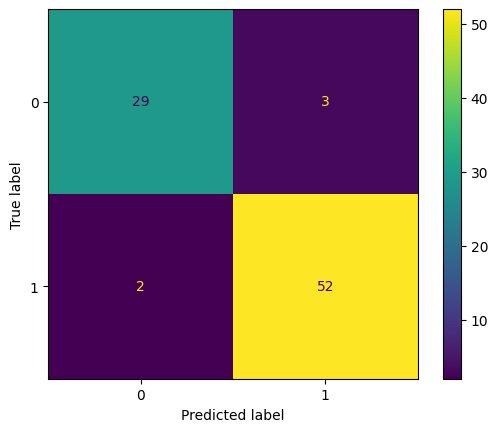

In [15]:
kNN_Classifier.show_confusion_matrix(labels=model.classes_)

# Experiments

In [62]:
def test_kNN_for_different_k_values(k_values: list, x_data:pd.DataFrame, y_data:pd.Series, test_size:float, if_scaled:bool=True):
    acc_dict = {}
    recall_dict = {}
    precision_dict = {}
    f1_score_dict = {}

    for k in k_values:
        kNN_Classifier = kNN_Classificator(k, x_data, y_data)

        x_train, x_test, y_train, y_test = kNN_Classifier.split_data(test_size, 42)

        if if_scaled:
            x_train_scaled = kNN_Classifier.scale_data(x_train)
            x_test_scaled = kNN_Classifier.scale_data(x_test)
            indexes = ['accuracy_scaled', 'recall__scaled', 'precision__scaled', 'f1_score__scaled']
        else:
            x_train_scaled = x_train
            x_test_scaled = x_test
            indexes = ['accuracy', 'recall', 'precision', 'f1_score']

        model = kNN_Classifier.train(x_train_scaled, y_train)

        predictions = kNN_Classifier.predict(model, x_test_scaled)
        accuracy = kNN_Classifier.calculate_accuracy(predictions, y_test)

        kNN_Classifier.get_confusion_matrix(model, x_test_scaled, y_test)

        precision = kNN_Classifier.calculate_precision()
        recall = kNN_Classifier.calculate_recall()
        f1_score = kNN_Classifier.calculate_f1_score()

        acc_dict[k] = accuracy
        recall_dict[k] = recall
        precision_dict[k] = precision
        f1_score_dict[k] = f1_score

    different_k_df = pd.DataFrame([acc_dict, recall_dict, precision_dict, f1_score_dict], index=indexes).T

    return different_k_df


def test_kNN_for_different_test_sizes(test_sizes:list, x_data:pd.DataFrame, y_data:pd.Series, if_scaled:bool=True, k:int=7):
    acc_dict = {}
    recall_dict = {}
    precision_dict = {}
    f1_score_dict = {}

    for test_size in test_sizes:
        kNN_Classifier = kNN_Classificator(k, x_data, y_data)

        x_train, x_test, y_train, y_test = kNN_Classifier.split_data(test_size, 42)

        if if_scaled:
            x_train_scaled = kNN_Classifier.scale_data(x_train)
            x_test_scaled = kNN_Classifier.scale_data(x_test)
            indexes = ['accuracy_scaled', 'recall__scaled', 'precision__scaled', 'f1_score__scaled']
        else:
            x_train_scaled = x_train
            x_test_scaled = x_test
            indexes = ['accuracy', 'recall', 'precision', 'f1_score']

        model = kNN_Classifier.train(x_train_scaled, y_train)

        predictions = kNN_Classifier.predict(model, x_test_scaled)
        accuracy = kNN_Classifier.calculate_accuracy(predictions, y_test)

        kNN_Classifier.get_confusion_matrix(model, x_test_scaled, y_test)

        precision = kNN_Classifier.calculate_precision()
        recall = kNN_Classifier.calculate_recall()
        f1_score = kNN_Classifier.calculate_f1_score()

        acc_dict[test_size] = accuracy
        recall_dict[test_size] = recall
        precision_dict[test_size] = precision
        f1_score_dict[test_size] = f1_score

    different_test_size_df = pd.DataFrame([acc_dict, recall_dict, precision_dict, f1_score_dict], index=indexes).T

    return different_test_size_df

### Trying different k values

In [54]:
k_values = [i for i in range(1, 10)]

different_k_df = test_kNN_for_different_k_values(k_values, X, y, 0.15, if_scaled=True)

different_k_df.head(10)



,accuracy_scaled,recall__scaled,precision__scaled,f1_score__scaled
1,0.918605,0.944444,0.927273,0.935780
2,0.953488,0.944444,0.980769,0.962264
3,0.941860,0.962963,0.945455,0.954128
4,0.941860,0.962963,0.945455,0.954128
5,0.941860,0.962963,0.945455,0.954128
6,0.953488,0.962963,0.962963,0.962963
7,0.941860,0.962963,0.945455,0.954128
8,0.953488,0.962963,0.962963,0.962963
9,0.953488,0.962963,0.962963,0.962963


### Trying different training sizes

In [63]:
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]

different_test_sizes_df = test_kNN_for_different_test_sizes(test_sizes=test_sizes, x_data=X, y_data=y, if_scaled=True, k=7)

different_test_sizes_df.head(10)



,accuracy_scaled,recall__scaled,precision__scaled,f1_score__scaled
0.10,0.947368,0.950000,0.974359,0.962025
0.15,0.941860,0.962963,0.945455,0.954128
0.20,0.956140,0.971831,0.958333,0.965035
0.25,0.965035,0.988764,0.956522,0.972376
0.30,0.970760,0.981481,0.972477,0.976959
0.35,0.970000,0.984496,0.969466,0.976923
0.40,0.969298,0.972973,0.979592,0.976271
0.45,0.968872,0.982036,0.970414,0.976190
0.50,0.961404,0.962567,0.978261,0.970350
0.55,0.952077,0.955882,0.970149,0.962963


### Trying without scaling the data

In [66]:
k_values = [i for i in range(1, 10)]

different_k_df_without_scaling = test_kNN_for_different_k_values(k_values, X, y, 0.15, if_scaled=False)

different_k_df_without_scaling.head(10)


,accuracy,recall,precision,f1_score
1,0.918605,0.981481,0.898305,0.938053
2,0.930233,0.944444,0.944444,0.944444
3,0.918605,0.962963,0.912281,0.936937
4,0.930233,0.962963,0.928571,0.945455
5,0.930233,0.981481,0.913793,0.946429
6,0.941860,0.962963,0.945455,0.954128
7,0.941860,0.981481,0.929825,0.954955
8,0.941860,0.981481,0.929825,0.954955
9,0.941860,0.981481,0.929825,0.954955


In [69]:
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]

different_test_sizes_df_without_scaling = test_kNN_for_different_test_sizes(test_sizes=test_sizes, x_data=X, y_data=y, if_scaled=False, k=7)

different_test_sizes_df_without_scaling.head(10)



,accuracy,recall,precision,f1_score
0.10,0.982456,0.975000,1.000000,0.987342
0.15,0.941860,0.981481,0.929825,0.954955
0.20,0.956140,0.985915,0.945946,0.965517
0.25,0.958042,0.977528,0.956044,0.966667
0.30,0.964912,0.981481,0.963636,0.972477
0.35,0.975000,0.984496,0.976923,0.980695
0.40,0.973684,0.979730,0.979730,0.979730
0.45,0.964981,0.976048,0.970238,0.973134
0.50,0.947368,0.978610,0.943299,0.960630
0.55,0.945687,0.975490,0.943128,0.959036


### Comparasion

In [70]:
k_comparison = pd.concat([different_k_df, different_k_df_without_scaling], axis=1)
k_comparison.head(10)

,accuracy_scaled,recall__scaled,precision__scaled,f1_score__scaled,accuracy,recall,precision,f1_score
1,0.918605,0.944444,0.927273,0.935780,0.918605,0.981481,0.898305,0.938053
2,0.953488,0.944444,0.980769,0.962264,0.930233,0.944444,0.944444,0.944444
3,0.941860,0.962963,0.945455,0.954128,0.918605,0.962963,0.912281,0.936937
4,0.941860,0.962963,0.945455,0.954128,0.930233,0.962963,0.928571,0.945455
5,0.941860,0.962963,0.945455,0.954128,0.930233,0.981481,0.913793,0.946429
6,0.953488,0.962963,0.962963,0.962963,0.941860,0.962963,0.945455,0.954128
7,0.941860,0.962963,0.945455,0.954128,0.941860,0.981481,0.929825,0.954955
8,0.953488,0.962963,0.962963,0.962963,0.941860,0.981481,0.929825,0.954955
9,0.953488,0.962963,0.962963,0.962963,0.941860,0.981481,0.929825,0.954955


In [71]:
test_size_comparison = pd.concat([different_test_sizes_df, different_test_sizes_df_without_scaling], axis=1)
test_size_comparison.head(10)

,accuracy_scaled,recall__scaled,precision__scaled,f1_score__scaled,accuracy,recall,precision,f1_score
0.10,0.947368,0.950000,0.974359,0.962025,0.982456,0.975000,1.000000,0.987342
0.15,0.941860,0.962963,0.945455,0.954128,0.941860,0.981481,0.929825,0.954955
0.20,0.956140,0.971831,0.958333,0.965035,0.956140,0.985915,0.945946,0.965517
0.25,0.965035,0.988764,0.956522,0.972376,0.958042,0.977528,0.956044,0.966667
0.30,0.970760,0.981481,0.972477,0.976959,0.964912,0.981481,0.963636,0.972477
0.35,0.970000,0.984496,0.969466,0.976923,0.975000,0.984496,0.976923,0.980695
0.40,0.969298,0.972973,0.979592,0.976271,0.973684,0.979730,0.979730,0.979730
0.45,0.968872,0.982036,0.970414,0.976190,0.964981,0.976048,0.970238,0.973134
0.50,0.961404,0.962567,0.978261,0.970350,0.947368,0.978610,0.943299,0.960630
0.55,0.952077,0.955882,0.970149,0.962963,0.945687,0.975490,0.943128,0.959036


# Homework (kNNwith wine dataset)

In [72]:
from sklearn.datasets import load_wine

In [94]:
# loading data
data = load_wine(as_frame=True)

X_wine = data.data
y_wine = data.target

# Testing the data for diffrent random states
test_size = 0.3
random_states = [12, 21, 22, 28, 42, 55, 66, 78, 88, 93, 101, 123, 156, 189, 212]
acc ={}
for state in random_states:
    # Create a kNN classifier
    kNN_wine = kNN_Classificator(7, X_wine, y_wine)
    # Split data first
    x_train, x_test, y_train, y_test = kNN_wine.split_data(test_size, state)

    # Scale the training and test data
    x_train_scaled = kNN_wine.scale_data(x_train)
    x_test_scaled = kNN_wine.scale_data(x_test)

    # Train the model
    model = kNN_wine.train(x_train_scaled, y_train)

    cm = kNN_wine.get_confusion_matrix(model, x_test_scaled, y_test)

    # Predict and calculate accuracy
    predictions = kNN_wine.predict(model, x_test_scaled)
    accuracy = kNN_wine.calculate_accuracy(predictions, y_test)

    acc[state] = accuracy

acc_df = pd.DataFrame(list(acc.items()), columns=['Random State', 'Accuracy'])
acc_df.head(20)


,Random State,Accuracy
0,12,1.000000
1,21,1.000000
2,22,0.962963
3,28,0.851852
4,42,0.962963
5,55,0.907407
6,66,0.907407
7,78,0.981481
8,88,0.962963
9,93,0.925926
